# Fossil Group Candidates - Statistics

In [1]:
import haccytools.mergertrees.visualization
import pickle
import random
import numpy as np
import pandas as pd
import statistics as sts
import astropy.units as u
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.pyplot import cm
from matplotlib.lines import Line2D
from astropy.cosmology import FlatLambdaCDM
from itertools import groupby
from matplotlib.ticker import ScalarFormatter
%load_ext line_profiler
%reload_ext autoreload
%autoreload 1
%aimport help_func

pyfftw not available, using numpy fft


In [2]:
forest_table = pd.read_hdf("/data/a/cpac/mbuehlmann/LJSV/forest_table.hdf5", key='table')
with open("/data/a/cpac/mbuehlmann/LJSV/progenitor_idx.pkl", "rb") as f:
    progenitor_idx = pickle.load(f)

#### Establish Globals

In [3]:
snap = 100
xaxis = 'z_nums'
thresholds = [5*10**11]
thresholds_are_absolute = True
my_bins = [10**13, 10**13.5, 10**15]
forest_masses = np.array(forest_table['mass'])
forest_snap_nums = np.array(forest_table['snap_num'])
# Convert snapshots to redshifts
redshifts = np.flip(np.array([10.044, 9.8065, 9.5789, 9.3608, 9.1515, 8.7573, 8.5714, 8.3925, 8.0541, 7.8938, 7.7391, 7.4454, 7.3058, 7.04, 6.9134, 6.6718, 6.5564, 6.3358, 6.1277, 6.028, 5.8367, 5.6556, 5.4839, 5.3208, 5.2422, 5.0909, 4.9467, 4.7429, 4.6145, 4.4918, 4.3743, 4.2618, 4.1015, 4.00, 3.8551, 3.763, 3.6313, 3.5475, 3.4273, 3.3133, 3.205, 3.102, 3.0361, 2.9412, 2.8506, 2.7361, 2.6545, 2.5765, 2.4775, 2.4068, 2.3168, 2.2524, 2.1703, 2.0923, 2.018, 1.9472, 1.8797, 1.7994, 1.7384, 1.68, 1.6104, 1.5443, 1.4938, 1.4334, 1.3759, 1.321, 1.2584, 1.2088, 1.152, 1.1069, 1.0552, 1.006, 0.9591, 0.9143, 0.8646, 0.824, 0.7788, 0.7358, 0.6948, 0.6557, 0.6184, 0.5777, 0.5391, 0.5022, 0.4714, 0.4337, 0.4017, 0.3636, 0.3347, 0.3035, 0.2705, 0.2423, 0.2123, 0.1837, 0.1538, 0.1279, 0.1008, 0.0749, 0.0502, 0.0245, 0.00]))

### Searching for Fossil Clusters

#### How does # FG candidates increase with threshold? (and with changing z?)

In [73]:
n_vals = 30
start = 10**10.8
test_thresholds = [start * 10**(0.1*i) for i in range(1, n_vals + 1)]
thresholds_are_absolute = True
my_bins = [10**13, 10**13.5, 10**15]
bin_halo_idx = help_func.bin_halos(forest_table, snap, my_bins)

# Make a custom legend
z_thresholds = [5, 7, 9]
linestyles = iter(['-', '--', ':', '-.'])
legs = []
labels = []
for this_z in z_thresholds:
    this_linestyle = next(linestyles)
    legs.append(Line2D([0,1],[0,1], linestyle = this_linestyle, color="black"))
    labels.append("z threshold = " + str(this_z))
custom_legend = [legs, labels]

z:  5
z:  7
z:  9


(100000000000, 20000000000000)

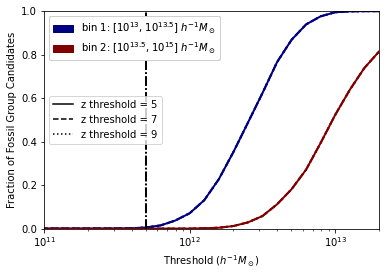

In [74]:
# Do some plotting
nbins = 2
norm_tf = True
plot_tots_tf = False
ax = None # For the first time plotting
fig = None
linestyles = iter(['-', '--', ':', '-.'])
my_marker = '.'
vert = 5*10**11 #None
#horz = None
special_bin_labels = [r"bin 1: [$10^{13}$, $10^{13.5}$] $h^{-1}M_\odot$", r"bin 2: [$10^{13.5}$, $10^{15}$] $h^{-1}M_\odot$"]
for this_z in z_thresholds:
    print("z: ", this_z)
    binned_timesteps, binned_masses, binned_main_prog_list, binned_maj_mergers, binned_mm_times, binned_LMMs, binned_LMM_times, binned_fossil_groups = help_func.track_evol_binned(bin_halo_idx, my_bins, redshifts, progenitor_idx, forest_masses, forest_snap_nums, test_thresholds, thresholds_are_absolute, x_axis = xaxis, z_threshold = this_z)
    horz = len(binned_masses[0])
    tot_num_candidates, binned_num_candidates = help_func.calc_candidates_vs_threshold(binned_fossil_groups, test_thresholds, nbins = nbins, normalized = norm_tf)
    fig, ax = help_func.plot_candidates_vs(test_thresholds, tot_num_candidates, binned_num_candidates, bins = my_bins, bin_labels = special_bin_labels, normalized = norm_tf, plot_tots = plot_tots_tf, fig = fig, ax = ax, vert_line = vert, hor_line = horz, cust_legend = custom_legend, linestyle = next(linestyles), linewidth = 2)
ax.set_xlim(10**11, 2*10**13)

In [72]:
fig.tight_layout()
fig.savefig("fraction_candidates_vs_all.pdf", bbox_inches='tight', pad_inches=0)

### Multiple (with possible FCs)

In [293]:
# Find the halos
my_range = [10**13, 10**13.5]
halo_idx = help_func.find_halos(forest_table, snap, n, mass_range = my_range)
# Track them
xaxis = 'z_nums'
snap_nums, masses, main_prog_list, maj_mergers, mm_times, LMMs, LMM_times, fossil_groups = help_func.track_evol_multiple(halo_idx, redshifts, progenitor_idx, forest_masses, forest_snap_nums, thresholds, thresholds_are_absolute, x_axis = xaxis)
print(len(fossil_groups))
print(fossil_groups)

In track_evol_multiple
4797
[None]


### Bins

#### Try to find some fossil groups

In [15]:
# Find and bin the halos
my_bins = [10**13, 10**13.5, 10**15]
bin_halo_idx = help_func.bin_halos(forest_table, snap, my_bins)
# Build main progenitor branches over all bins
binned_timesteps, binned_masses, binned_main_prog_list, binned_lum_mergers, binned_lm_times, binned_LLMs, binned_LLM_times, binned_fossil_groups = help_func.track_evol_binned(bin_halo_idx, my_bins, redshifts, progenitor_idx, forest_masses, forest_snap_nums, thresholds, thresholds_are_absolute, x_axis = xaxis)

#### Rearrange those fossil groups

In [16]:
rearranged_fossil_groups = [[[this_halo[i] for this_halo in this_bin if this_halo[i] is not None] for this_bin in binned_fossil_groups] for i in range(len(thresholds))] 
print("In the first bin, out of ", len(binned_masses[0]), " halos, ", len(rearranged_fossil_groups[0][0]), " are fossil groups candidates. Ratio: ", len(rearranged_fossil_groups[0][0]) / len(binned_masses[0]))
print("In the second bin, out of ", len(binned_masses[1]), " halos, ", len(rearranged_fossil_groups[0][1]), " are fossil groups candidates. Ratio: ", len(rearranged_fossil_groups[0][1]) / len(binned_masses[1]))

In the first bin, out of  4797  halos,  434  are fossil groups candidates. Ratio:  0.09047321242443193
In the second bin, out of  1784  halos,  7  are fossil groups candidates. Ratio:  0.003923766816143498


#### Make fossil groups the new binned_halo_idx

In [17]:
fg_bin_halo_idx = rearranged_fossil_groups[0] # Pick those found by the first threshold definition
fg_timesteps, fg_masses, fg_main_prog_list, fg_lum_mergers, fg_lm_times, fg_LLMs, fg_LLM_times, fg_fossil_groups = help_func.track_evol_binned(fg_bin_halo_idx, my_bins, redshifts, progenitor_idx, forest_masses, forest_snap_nums, thresholds, thresholds_are_absolute, x_axis = xaxis)

#### How do they evolve?

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Mass evolution of halo(s)'}, xlabel='Redshift $z$', ylabel='Mass $[h^{-1}M_\\odot]$'>)

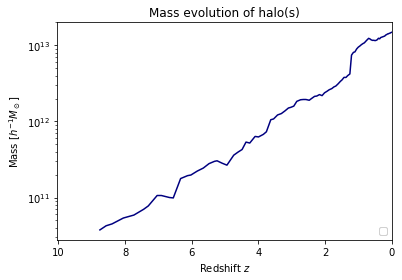

In [22]:
# Just one halo
halo_idx = 101289040
# Track them

time_nums, masses, main_prog_list, major_mergers, mm_times, LMMs, LMM_times, fossil_groups = help_func.track_evol(halo_idx, redshifts, progenitor_idx, forest_masses, forest_snap_nums, thresholds, x_axis = xaxis, z_threshold = 1)
# Plot them
help_func.plot_evol([time_nums], [masses], [mm_times], thresholds, x_axis = xaxis)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Mass evolution of halo(s)'}, xlabel='Redshift [z]', ylabel='Mass [M_sun/h]'>)

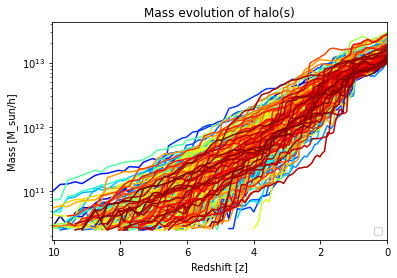

In [97]:
# One range
halo_idx = fg_bin_halo_idx[0]
norm_tf = False
timesteps, masses, main_prog_list, maj_mergers, mm_times, LMMs, LMM_times, fossil_groups = help_func.track_evol_multiple(halo_idx, redshifts, progenitor_idx, forest_masses, forest_snap_nums, thresholds, x_axis = xaxis, normalized = norm_tf)
# Plot them
help_func.plot_evol(timesteps, masses, filename = "norm_fg_mass_evol", x_axis = xaxis)

#### Fancy Sub-sample version

In [8]:
def getsubsampleindex(npoints,datalength):
    index=np.asarray([])
    if(datalength>0):
        sample=np.random.sample(datalength)
        fraction=min(float(npoints)/float(datalength),1.0)
        index=(sample<fraction)
    return index

434
7


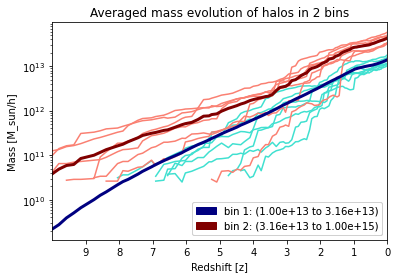

In [59]:
# Samples and averages
N = 7
fig = None
ax = None
color = iter(["turquoise", "salmon"])
for bin_n, halo_idx in enumerate(fg_bin_halo_idx): # For each bin
    print(len(halo_idx))
    #fg_timesteps, fg_masses, fg_main_prog_list, fg_maj_mergers, fg_mm_times, fg_LMMs, fg_LMM_times, fg_fossil_groups = help_func.track_evol_binned(halo_idx, my_bins, redshifts, progenitor_idx, forest_masses, forest_snap_nums, thresholds, thresholds_are_absolute, x_axis = xaxis)
    current_color = next(color)
    sampled_idx = np.random.choice(halo_idx, N, replace=False)
    norm_tf = False
    timesteps, masses, main_prog_list, maj_mergers, mm_times, LMMs, LMM_times, fossil_groups = help_func.track_evol_multiple(sampled_idx, redshifts, progenitor_idx, forest_masses, forest_snap_nums, thresholds, x_axis = xaxis, normalized = norm_tf)
    # Plot them
    fig, ax = help_func.plot_evol(timesteps, masses, x_axis = xaxis, cust_color = current_color, fig = fig, ax = ax)

avg_tf = True
avg_timesteps, avg_masses = help_func.avg_bins(fg_bin_halo_idx, my_bins, redshifts, progenitor_idx, forest_masses, forest_snap_nums, thresholds, thresholds_are_absolute, x_axis = xaxis)
fig, ax = help_func.plot_evol(avg_timesteps, avg_masses, bins = my_bins, avg = avg_tf, x_axis = xaxis, fig = fig, ax = ax, linewidth = 3)
#ax.set_xscale('symlog')
end = 10
ax.set_xlim(end,0)
ax.xaxis.set_ticks(np.arange(0, end, 1))
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.set_title(r"Mass evolution of halos in bin 1: $[10^{13}, 10^{13.5}]$ $h^{-1}M_\odot$")

In [18]:
fig.savefig("test_evolution.png")

#### Alternative fancy subsamples

434
7


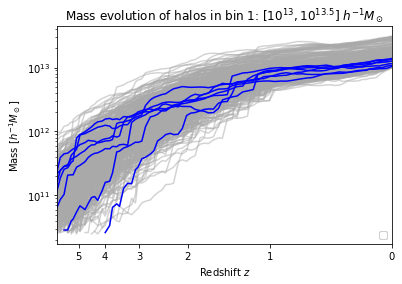

In [137]:
# One range
N = 7
fig = None
ax = None
color = iter(["darkgrey", "blue"])
sampled_idx = np.random.choice(fg_bin_halo_idx[0], N, replace=False)
print(len(halo_idx))
print(len(sampled_idx))
full_idx = [fg_bin_halo_idx[0], sampled_idx]
alphas = iter([0.5, 1])
for this_idx in full_idx:
    current_color = next(color)
    current_alpha = next(alphas)
    timesteps, masses, main_prog_list, maj_mergers, mm_times, LMMs, LMM_times, fossil_groups = help_func.track_evol_multiple(this_idx, redshifts, progenitor_idx, forest_masses, forest_snap_nums, thresholds, x_axis = xaxis, normalized = norm_tf)
    fig, ax = help_func.plot_evol(timesteps, masses, x_axis = xaxis, cust_color = current_color, fig = fig, ax = ax, alpha = current_alpha)
ax.set_xscale('symlog', linthresh = 1, linscale = 0.4)
ax.set_xlim(6, 0)
stepsize = 1
end = 6
ax.xaxis.set_ticks(np.arange(0, end, stepsize))
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.set_title(r"Mass evolution of halos in bin 1: $[10^{13}, 10^{13.5}]$ $h^{-1}M_\odot$")
fig.savefig("test_evol_grey.png")

#### Compare to full dataset

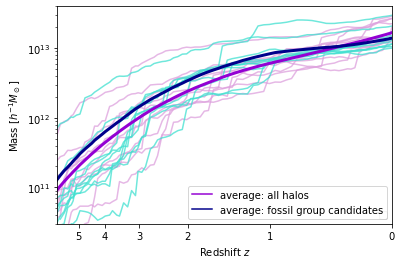

In [57]:
# Samples and averages
N = 10
fig = None
ax = None
my_bins = [10**13, 10**13.5]
handles = []
color = iter(["plum", "turquoise"])
for bin_n, halo_idx in enumerate([bin_halo_idx[0], fg_bin_halo_idx[0]]): # For each bin
    current_color = next(color)
    sampled_idx = np.random.choice(halo_idx, N, replace=False)
    timesteps, masses, main_prog_list, maj_mergers, mm_times, LMMs, LMM_times, fossil_groups = help_func.track_evol_multiple(sampled_idx, redshifts, progenitor_idx, forest_masses, forest_snap_nums, thresholds, x_axis = xaxis)
    fig, ax = help_func.plot_evol(timesteps, masses, x_axis = xaxis, cust_color = current_color, fig = fig, ax = ax, alpha = 0.75)
    
color_for_avgs = iter(["darkviolet", "darkblue"])
avg_tf = True
label_for_avgs = iter(["average: all halos", "average: fossil group candidates"])
#print(len(custom_legend))
for bin_n, halo_idx in enumerate([bin_halo_idx[0], fg_bin_halo_idx[0]]):
    current_color = next(color_for_avgs)
    current_label = next(label_for_avgs)
    avg_timesteps, avg_masses = help_func.avg_bins([halo_idx], my_bins, redshifts, progenitor_idx, forest_masses, forest_snap_nums, thresholds, thresholds_are_absolute, x_axis = xaxis)
    fig, ax = help_func.plot_evol(avg_timesteps, avg_masses, bins = my_bins, avg = avg_tf, x_axis = xaxis, fig = fig, ax = ax, cust_color = current_color, auto_legend = False, linewidth = 3)
    fake_line, = ax.plot([],[], color=current_color, label=current_label)
    handles.append(fake_line)
    
xend = 6
ax.set_xlim(xend,0)
ax.set_xscale('symlog', linthresh = 1, linscale = 0.4)
ax.set_ylim(3*10**10, 4*10**13)
ax.xaxis.set_ticks(np.arange(0, xend, 1))
ax.xaxis.set_major_formatter(ScalarFormatter())

# Make a fake legend
ax.legend(handles = handles, loc = "lower right")

In [58]:
fig.tight_layout()
fig.savefig("mass_evol_compare.pdf", bbox_inches='tight', pad_inches=0)

### On average

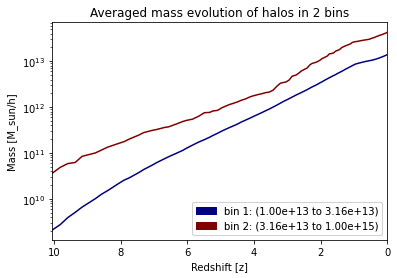

In [165]:
# On average
avg_timesteps, avg_masses = help_func.avg_bins(fg_bin_halo_idx, my_bins, redshifts, progenitor_idx, forest_masses, forest_snap_nums, thresholds, thresholds_are_absolute, x_axis = xaxis)
fig, ax = help_func.plot_evol(avg_timesteps, avg_masses, "fg_mass_evol_binned_avg", bins = my_bins, avg = avg_tf, x_axis = xaxis)

In [86]:
fig.savefig("fg_mass_evol_binned_avg.png")

### Compare fgs with total dataset

##### Compare Cumulative Major Mergers (general vs. fgs)

In [76]:
# Make some special labels for bins
special_bin_labels = [r"bin 1: [$10^{13}$, $10^{13.5}$] $h^{-1}M_\odot$", r"bin 2: [$10^{13.5}$, $10^{15}$] $h^{-1}M_\odot$"]

# Make a custom legend:
linestyles = iter(['-', '--', ':', '-.'])
legs = []
labels = ["All halos", "Fossil group candidates"]
for this_label in labels:
    this_linestyle = next(linestyles)
    legs.append(Line2D([0,1],[0,1], linestyle = this_linestyle, color="black"))
custom_legend = [legs, labels]

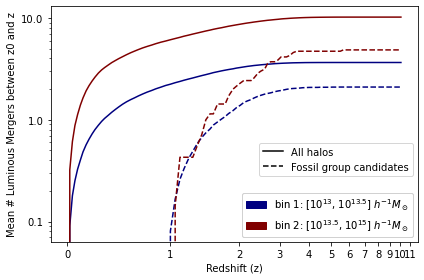

In [80]:
binned_avgs_general = help_func.binned_avg_cum_lum_mergers(binned_lm_times, redshifts)
binned_avgs_fg = help_func.binned_avg_cum_lum_mergers(fg_lm_times, redshifts)
fig, ax = help_func.plot_cum_lms(binned_avgs_general, my_bins, thresholds, bin_labels = special_bin_labels, cust_legend = custom_legend) 
help_func.plot_cum_lms(binned_avgs_fg, my_bins, thresholds, fig = fig, ax = ax, bin_labels = special_bin_labels, cust_legend = custom_legend, linestyle = '--')
fig.tight_layout()
fig.savefig("cum_lms_compare.pdf", bbox_inches='tight', pad_inches=0)

##### Compare Distribution of Major Mergers (general vs. fgs)

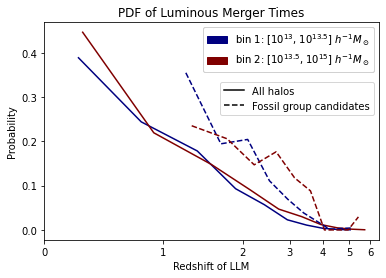

In [38]:
# Remember, we already did this
#binned_snap_nums, binned_masses, binned_main_prog_list, binned_maj_mergers, binned_mm_times, binned_LMMs, binned_LMM_times, binned_fossil_groups = help_func.track_evol_binned(bin_halo_idx, my_bins, redshifts, progenitor_idx, forest_masses, forest_snap_nums, thresholds, thresholds_are_absolute, x_axis = xaxis)
xaxis = 'z_nums'
fig, ax = help_func.pdf_lms(binned_lm_times, thresholds, my_bins, bin_labels = special_bin_labels,  x_axis = xaxis)
help_func.pdf_lms(fg_lm_times, thresholds, my_bins, x_axis = xaxis, fig = fig, ax = ax, bin_labels = special_bin_labels, cust_legend = custom_legend, linestyle = '--')
fig.savefig("pdf_lms_compare.pdf")

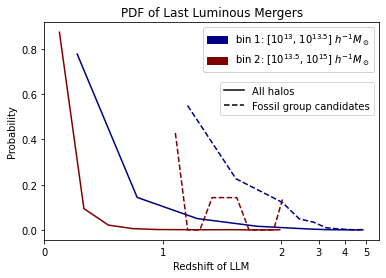

In [52]:
xaxis = 'z_nums'
fig, ax = help_func.plot_LLMs(binned_LLM_times, thresholds, bins = my_bins, bin_labels = special_bin_labels, x_axis = xaxis)
help_func.plot_LLMs(fg_LLM_times, thresholds, bins = my_bins, bin_labels = special_bin_labels, cust_legend = custom_legend, x_axis = xaxis, fig = fig, ax = ax, linestyle = '--')
fig.savefig("pdf_llms_compare.pdf")

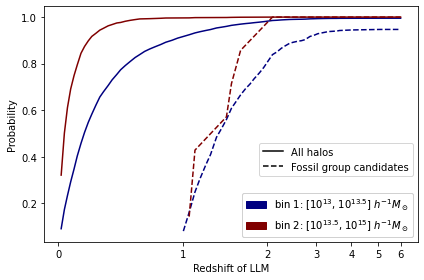

In [81]:
z_end = 6
fig, ax = help_func.plot_CDF(binned_LLM_times, binned_masses, thresholds, bins = my_bins, bin_labels = special_bin_labels, redshifts = redshifts, x_axis = 'z_nums', z_end = z_end)
help_func.plot_CDF(fg_LLM_times, fg_masses, thresholds, bins = my_bins, bin_labels = special_bin_labels, cust_legend = custom_legend, redshifts = redshifts, x_axis = 'z_nums', fig = fig, ax = ax, z_end = z_end, linestyle = '--')
fig.tight_layout()
fig.savefig("cum_llms_compare.pdf", bbox_inches='tight', pad_inches=0)

[[<matplotlib.lines.Line2D object at 0x7f341116a730>, <matplotlib.lines.Line2D object at 0x7f341116a310>], ['All groups', 'Just fossil groups']]


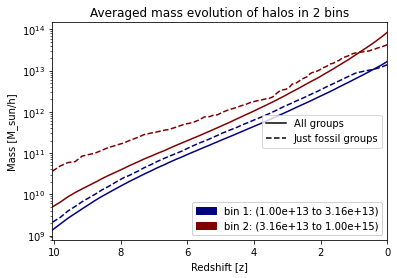

In [166]:
# Make a custom legend
bin_names = ["All groups", "Just fossil groups"]
linestyles = iter(['-', '--'])
legs = []
labels = []
for bin_name in bin_names:
    this_linestyle = next(linestyles)
    legs.append(Line2D([0,1],[0,1], linestyle = this_linestyle, color="black"))
    labels.append(bin_name)
custom_legend = [legs, labels]
print(custom_legend)
                   
fig = None
ax = None
norm_tf = False
linestyles = iter(['-', '--'])
for new_bin_halo_idx in [bin_halo_idx, fg_bin_halo_idx]:
    avg_timesteps, avg_masses = help_func.avg_bins(new_bin_halo_idx, my_bins, redshifts, progenitor_idx, forest_masses, forest_snap_nums, thresholds, thresholds_are_absolute, normalized = norm_tf)
    fig,ax = help_func.plot_evol(avg_timesteps, avg_masses, filename = "avg_evol_comp", bins = my_bins, avg = avg_tf, normalized = norm_tf, fig = fig, ax = ax, cust_legend = custom_legend, linestyle = next(linestyles))

#### Try with just one range

Bin 1, Threshold 1

932  halos in this bin and threshold
In track_evol_multiple


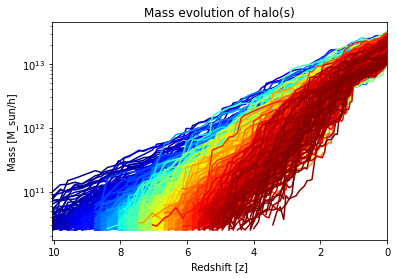

In [135]:
# Find and bin the halos
halo_idx_b1t1 = rearranged_fossil_groups[0][0] # Just the first bin under the first threshold
print(len(halo_idx_b1t1), " halos in this bin and threshold")
# Track them (and take their averages in the process)
xaxis = 'z_nums'
#%lprun -f help_func.track_evol_binned
m_snap_nums, m_masses, m_main_prog_list, m_maj_mergers, m_mm_times, m_LMMs, m_LMM_times, m_fossil_groups = help_func.track_evol_multiple(halo_idx_b1t1, redshifts, progenitor_idx, forest_masses, forest_snap_nums, thresholds, x_axis = xaxis)
help_func.plot_evol(m_snap_nums, m_masses, "practice_fcs")

### 7) Draw a Tree

#### Plot a tree for a fossil group candidate (how to plot multiple in a loop)?

In [281]:
fg_bin_halo_idx[0][1:10]

[101289040,
 101289153,
 101293189,
 101293959,
 101297931,
 101299746,
 101303636,
 101306586,
 101309054]

This halo has mass:  1.12e+13


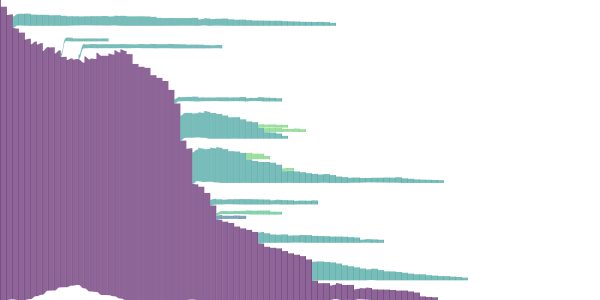

In [18]:
target_idx =  101313752 # [101289040, 101289153, 101293189, 101293959, 101303636, 101311468, 101313752, 101319871, 101320173]
print("This halo has mass: ", "{:.2e}".format(forest_masses[target_idx]))
max_steps = 100  # the number of snapshots in the past you want to plot
mass_threshold = 1e11  # halos below this threshold will be ignored
method = 'recursive'  # other options: 'center', block', 'recursive'
padding = 0.01  # ~fraction of vertical space that is used to space out halos in a snapshot
#cmap = 'some matplotlib colormap'
height=300
d = haccytools.mergertrees.visualization.get_tree_drawing(forest_table, progenitor_idx, target_idx, max_steps=max_steps, mass_threshold=mass_threshold, method=method, padding=padding, height=height)
d
#my_idx = fg_bin_halo_idx[0][1:10]
#plots = []
#for target_idx in my_idx:
#    print("This halo: ", target_idx, " has mass: ", "{:.2e}".format(forest_masses[target_idx]))
#    d = haccytools.haccytools.mergertrees.visualization.get_tree_drawing(forest_table, progenitor_idx, target_idx, max_steps=max_steps, mass_threshold=mass_threshold, method=method, padding=padding, height=height)
#    d

#### Plot a tree for a random halo (in that bin, not necessarily a FG candidate)

In [33]:
forest_table

,halo_id,tree_node_id,core_tag,descendant_id,descendant_idx,snap_num,scale_factor,mass,mass_sod,mass_fof,...,vel_z,spin_x,spin_y,spin_z,vel_disp,vmax,cdelta_sod,radius_sod,fsubtot,fsubmax
0,0,189151184349560832,189151184349560832,1592,1592,0,0.090547,4.752123e+10,4.752123e+10,4.752123e+10,...,1689.959351,-101.0,-101.0,-101.0,707.903564,50.023136,-101.0,-101.0,0.000000,0.000000
1,1,189151184349560833,189151184349560833,1593,1593,0,0.090547,5.252347e+10,5.252347e+10,5.252347e+10,...,-626.812927,-101.0,-101.0,-101.0,578.288025,46.939880,-101.0,-101.0,0.000000,0.000000
2,2,189151184349560834,189151184349560834,1594,1594,0,0.090547,2.501118e+10,2.501118e+10,2.501118e+10,...,1758.607300,-101.0,-101.0,-101.0,497.131866,46.939880,-101.0,-101.0,0.000000,0.000000
3,3,189151184349560835,189151184349560835,1595,1595,0,0.090547,2.501118e+10,2.501118e+10,2.501118e+10,...,1562.107422,-101.0,-101.0,-101.0,517.261230,46.939880,-101.0,-101.0,0.000000,0.000000
4,4,189151184349560836,189151184349560836,1597,1597,0,0.090547,3.126397e+10,3.126397e+10,3.126397e+10,...,4537.584961,-101.0,-101.0,-101.0,522.582458,46.939880,-101.0,-101.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103073498,103073498,2247296759518735661,535928901117942762,-1,-1,100,1.000000,1.813310e+11,1.813310e+11,1.813310e+11,...,-219.895157,-101.0,-101.0,-101.0,31.580864,103.880081,-101.0,-101.0,0.001359,0.001359
103073499,103073499,2247296759518735662,1035828459756072210,-1,-1,100,1.000000,4.752123e+10,4.752123e+10,4.752123e+10,...,-151.561127,-101.0,-101.0,-101.0,22.005903,79.121994,-101.0,-101.0,0.000000,0.000000
103073500,103073500,2247296759518735663,635008092920095427,-1,-1,100,1.000000,1.700760e+11,1.700760e+11,1.700760e+11,...,68.362045,-101.0,-101.0,-101.0,27.259924,103.364906,-101.0,-101.0,0.002270,0.002270
103073501,103073501,2247296759518735664,2247296759518735664,-1,-1,100,1.000000,2.876285e+10,2.876285e+10,2.876285e+10,...,-19.531290,-101.0,-101.0,-101.0,76.068031,46.939880,-101.0,-101.0,0.000000,0.000000


In [60]:
my_bins = [10**13, 5*10**13, 10**16]
bin_halo_idx = help_func.bin_halos(forest_table, snap, my_bins)
print(bin_halo_idx[0][1:10])

[101284116 101284373 101284558 101285015 101285111 101285383 101285634
 101285674 101286137]


19780090000000.0


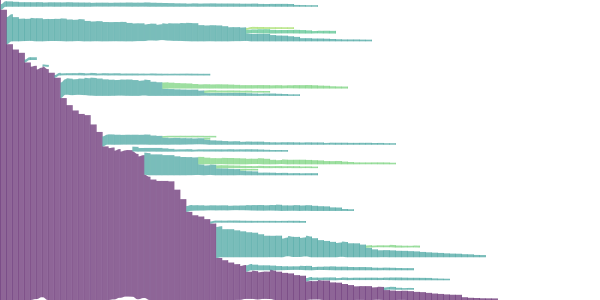

In [15]:
import haccytools.mergertrees.visualization
target_idx =  101284558 # 101283948 101283955 101283962 101284033 101284066 101284068 101284104 101284123 101284198
print(forest_masses[target_idx])
max_steps = 100  # the number of snapshots in the past you want to plot
mass_threshold = 1e11  # halos below this threshold will be ignored
method = 'recursive'  # other options: 'center', block', 'recursive'
padding = 0.01  # ~fraction of vertical space that is used to space out halos in a snapshot
#cmap = 'some matplotlib colormap'
height=300
d = haccytools.mergertrees.visualization.get_tree_drawing(forest_table, progenitor_idx, target_idx, max_steps=max_steps, mass_threshold=mass_threshold, method=method, padding=padding, height=height)
d

#### Plot a tree for the most massive halo in the sim

In [64]:
halo_idx = help_func.find_halos(forest_table, snap, n, extremum = 'max')
for i in halo_idx:
    print("halo: ", i, " has mass: ", "{:.2e}".format(forest_masses[i]))

halo:  102663885  has mass:  8.02e+14
halo:  102306212  has mass:  8.55e+14
halo:  102894442  has mass:  9.29e+14
halo:  102908949  has mass:  9.36e+14
halo:  101838135  has mass:  9.36e+14
halo:  102607840  has mass:  1.00e+15
halo:  101909644  has mass:  1.03e+15
halo:  101391674  has mass:  1.07e+15
halo:  101628592  has mass:  1.12e+15
halo:  101908838  has mass:  1.18e+15


In [135]:
import haccytools.mergertrees.visualization
target_idx =  101908838 # 101283948 101283955 101283962 101284033 101284066 101284068 101284104 101284123 101284198
print(forest_masses[target_idx])
max_steps = 100  # the number of snapshots in the past you want to plot
mass_threshold = 5e11  # halos below this threshold will be ignored
method = 'recursive'  # other options: 'center', block', 'recursive'
padding = 0.01  # ~fraction of vertical space that is used to space out halos in a snapshot
#cmap = 'some matplotlib colormap'
height=300
d = haccytools.mergertrees.visualization.get_tree_drawing(forest_table, progenitor_idx, target_idx, max_steps=max_steps, mass_threshold=mass_threshold, method=method, padding=padding, height=height)
d

1178118900000000.0


### 8) Check out the new keys (fsubtot and fsubmax)

In [91]:
norm = 2.7*10**9
my_idx = fg_bin_halo_idx[0] # 434 entries
fg_fsubmax = forest_table['fsubmax'][my_idx].values
fg_fsubtot = forest_table['fsubtot'][my_idx].values
fg_avg_fsubmax = np.average(fg_fsubmax)
std_dev_fg_fsubmax = np.std(fg_fsubmax)
sem_fg_fsubmax = std_dev_fg_fsubmax / np.sqrt(len(fg_fsubmax))
fg_avg_fsubtot = np.average(fg_fsubtot)
std_dev_fg_fsubtot = np.std(fg_fsubtot)
sem_fg_fsubtot = std_dev_fg_fsubtot / np.sqrt(len(fg_fsubtot))

mask = forest_table.halo_id.loc[(forest_table.snap_num == 100) & (forest_table.mass >= 10**13) & (forest_table.mass <= 10**13.5)].values
fsubmax = forest_table['fsubmax'][mask].values
fsubtot = forest_table['fsubtot'][mask].values
avg_fsubmax = np.average(fsubmax)
std_dev_fsubmax = np.std(fsubmax)
sem_fsubmax = std_dev_fsubmax / np.sqrt(len(fsubmax))
avg_fsubtot = np.average(fsubtot)
std_dev_fsubtot = np.std(fsubtot)
sem_fsubtot = std_dev_fsubtot / np.sqrt(len(fsubtot))

print("fsubmax overall average : ", avg_fsubmax, " with std dev: ", std_dev_fsubmax)
print("fsubtot overall average : ", avg_fsubtot, " with std dev: ", std_dev_fsubtot, "\n")
print("fossil group fsubmax avg: ", fg_avg_fsubmax, " with std dev: ", std_dev_fg_fsubmax) 
print("fossil group fsubtot avg: ", fg_avg_fsubtot, " with std dev: ", std_dev_fg_fsubtot, "\n")

all_ratio = forest_table['fsubmax'][mask].values/forest_table['fsubtot'][mask].values
finite_all_ratio = all_ratio[~np.isnan(all_ratio)]
avg_all_ratio = np.average(finite_all_ratio)
std_dev_all_ratio = np.std(finite_all_ratio)
sem_all_ratio = std_dev_all_ratio / np.sqrt(len(finite_all_ratio))

fg_ratio = forest_table['fsubmax'][my_idx].values/forest_table['fsubtot'][my_idx].values
finite_fg_ratio = fg_ratio[~np.isnan(fg_ratio)]
avg_fg_ratio = np.average(finite_fg_ratio)
std_dev_fg_ratio = np.std(finite_fg_ratio)
sem_fg_ratio = std_dev_fg_ratio / np.sqrt(len(finite_fg_ratio))
print("average ratio overall: ", avg_all_ratio, " with std dev ", std_dev_all_ratio)
print("average ratio for fossil groups: ", avg_fg_ratio, " with std dev ", std_dev_fg_ratio)

print("\nSEMs")
print("fg fsubmax: ", sem_fg_fsubmax)
print("fg fsubtot: ", sem_fg_fsubtot)
print("fsubmax: ", sem_fsubmax)
print("fsubtot: ", sem_fsubtot)
print("fg ratio: ", sem_fg_ratio)
print("all ratio: ", sem_all_ratio)

fsubmax overall average :  0.058208134  with std dev:  0.06616081
fsubtot overall average :  0.18733019  with std dev:  0.085173674 

fossil group fsubmax avg:  0.008854736  with std dev:  0.004470216
fossil group fsubtot avg:  0.10179175  with std dev:  0.023926701 

average ratio overall:  0.25495884  with std dev  0.16746907
average ratio for fossil groups:  0.08726417  with std dev  0.038982466

SEMs
fg fsubmax:  0.0002941186266640394
fg fsubtot:  0.0015742613738757485
fsubmax:  0.0009552476410536023
fsubtot:  0.0012297604494580117
fg ratio:  0.0025648579488422095
all ratio:  0.002417963538630006


#### Make a histogram of these

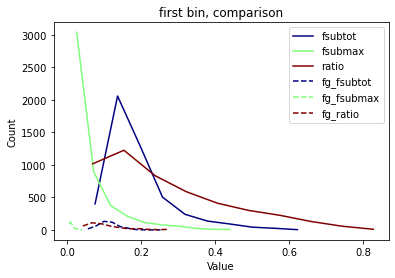

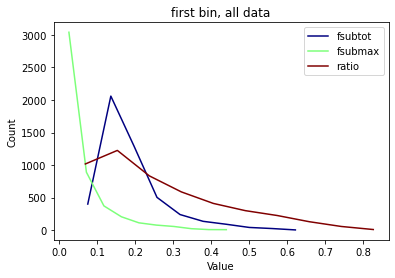

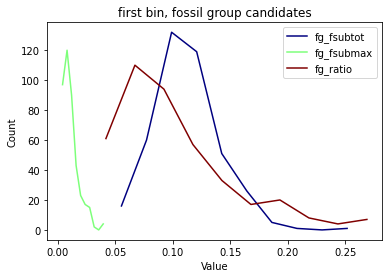

In [170]:
norm_tf = False
data = [[fsubtot, fsubmax, finite_all_ratio], [fg_fsubtot, fg_fsubmax, finite_fg_ratio]]
data_names = [['fsubtot',  'fsubmax', 'ratio'], ['fg_fsubtot', 'fg_fsubmax', 'fg_ratio']]
fig, ax = help_func.plot_hist_dist(data, data_names, filename = "all_fstats", normalized = norm_tf)
ax.set_title("first bin, comparison")
fig.savefig("all_fstats_norm.png")

data1 = [[fsubtot, fsubmax, finite_all_ratio]]
data_names1 = [['fsubtot',  'fsubmax', 'ratio']]
fig, ax = help_func.plot_hist_dist(data1, data_names1, filename = "all_fstats", normalized = norm_tf)
ax.set_title("first bin, all data")
fig.savefig("full_only_fstats_norm.png")

data2 = [[fg_fsubtot, fg_fsubmax, finite_fg_ratio]]
data_names2 = [['fg_fsubtot', 'fg_fsubmax', 'fg_ratio']]
fig, ax = help_func.plot_hist_dist(data2, data_names2, filename = "all_fstats", normalized = norm_tf)
ax.set_title("first bin, fossil group candidates")
fig.savefig("fg_fstats_norm.png")

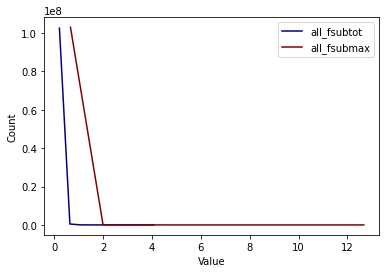

In [196]:
all_fsubmax = forest_table['fsubmax'].values
all_fsubtot = forest_table['fsubtot'].values
data = [[all_fsubmax, all_fsubtot]]
data_names = [['all_fsubtot', 'all_fsubmax']]
help_func.plot_hist_dist(data, data_names, filename = "all_fstats")

#### Try to plot PDFs more efficiently

In [9]:
xaxis = 'z_nums'
thresholds = [5*10**11]  #[1/10, 0.3] 
thresholds_are_absolute = True #False
# Find and bin the halos
my_bins = [10**13, 5*10**13, 10**15] #[10**13, 10**13.5, 10**14, 10**14.5]
bin_halo_idx = help_func.bin_halos(forest_table, snap, my_bins)
# Track them
binned_snap_nums, binned_masses, binned_main_prog_list, binned_maj_mergers, binned_mm_times, binned_LMMs, binned_LMM_times, binned_fossil_groups = help_func.track_evol_binned(bin_halo_idx, my_bins, redshifts, progenitor_idx, forest_masses, forest_snap_nums, thresholds, thresholds_are_absolute, x_axis = xaxis)
mm_values = help_func.pdf_mms(binned_mm_times, thresholds, 'z_nums')

In track_evol_multiple
In track_evol_multiple


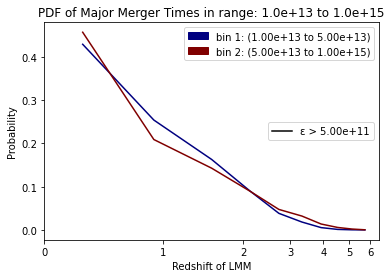

In [23]:
my_plot = help_func.plot_binned_pdf(mm_values, thresholds, bins = my_bins, x_axis = xaxis)

In [24]:
my_plot.show()